### Lab | Customer Analysis Round 6
#For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.
#Get the data --> We are using the marketing_customer_analysis.csv file.

In [1]:
# 1. Dealing with the data (already (done in the round 2).
# 2. Explore the data (done in the round 3).
# 3. Processing Data (Further processing...)
# 4. X-y split. (done)
# 5. Normalize (numerical). (done)
# 6. One Hot/Label Encoding (categorical).
# 7. Concat DataFrames
# 8. Linear Regression
# 9. Train-test split.
# 10. Apply linear regression.
# 11. Model Validation. Description:
    # 11.1. R2.
    # 11.2. MSE.
    # 11.3. RMSE.
    # 11.4. MAE.

In [2]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Usuari\Documents\IRONHACK\Work\Labs\01 semana\2023-03-09\marketing_customer_analysis.csv")

In [3]:
# 1. Dealing with the data
df.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [4]:
df=df.dropna()

In [5]:
# 2. Explore the data (done in the round 3).
df.dtypes

Unnamed: 0                         int64
Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size    

In [6]:
# 3. Processing Data (Further processing...)
numericos=df.select_dtypes(include=["int64", "float64"])
categoricos=df.select_dtypes(exclude=["int64", "float64"])

In [7]:
correlaciones=numericos.corr()
correlaciones

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Unnamed: 0,1.000000,0.018506,0.002476,-0.002327,-0.012626,0.016022,-0.007972,-0.004518,-0.008315
Customer Lifetime Value,0.018506,1.000000,0.015914,0.413739,0.029199,0.022465,-0.034924,0.015397,0.228579
Income,0.002476,0.015914,1.000000,-0.007594,-0.010556,-0.007987,0.001149,-0.013199,-0.355311
Monthly Premium Auto,-0.002327,0.413739,-0.007594,1.000000,0.000890,0.033422,-0.002469,-0.025578,0.630894
Months Since Last Claim,-0.012626,0.029199,-0.010556,0.000890,1.000000,-0.036879,-0.000364,0.001089,-0.011449
Months Since Policy Inception,0.016022,0.022465,-0.007987,0.033422,-0.036879,1.000000,-0.001965,-0.009029,0.012610
Number of Open Complaints,-0.007972,-0.034924,0.001149,-0.002469,-0.000364,-0.001965,1.000000,0.014388,-0.003433
Number of Policies,-0.004518,0.015397,-0.013199,-0.025578,0.001089,-0.009029,0.014388,1.000000,0.002864
Total Claim Amount,-0.008315,0.228579,-0.355311,0.630894,-0.011449,0.012610,-0.003433,0.002864,1.000000


In [8]:
# 4. X-y split. (done)
x = df.drop(columns="Customer Lifetime Value") # Cojo todo menos customer lifetime value
y = df["Customer Lifetime Value"] # Cojo solo customer lifetime value

In [9]:
# 5. Normalize (numerical). (done)
from sklearn.preprocessing import MinMaxScaler #Has de importar esta libreria para normalizar

In [10]:
scaler=MinMaxScaler()
nomalized_df=scaler.fit_transform(df.select_dtypes(include=["int64", "float64"]))

In [11]:
nomalized_df # Check nuestra matriz de valores normalizados:

array([[0.00000000e+00, 1.60202595e-01, 2.21476376e-01, ...,
        0.00000000e+00, 1.25000000e-01, 1.65875444e-01],
       [9.16926462e-05, 2.50897719e-01, 4.90971479e-01, ...,
        0.00000000e+00, 1.25000000e-01, 1.67262660e-01],
       [7.33541170e-04, 3.99251795e-02, 8.27622773e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.52921040e-01],
       ...,
       [9.99633229e-01, 2.12775351e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.25000000e-01, 3.10216853e-01],
       [9.99816615e-01, 4.12108464e-02, 6.11698562e-01, ...,
        0.00000000e+00, 6.25000000e-01, 9.43334435e-02],
       [1.00000000e+00, 1.23652740e-01, 6.42200458e-01, ...,
        8.00000000e-01, 6.25000000e-01, 2.13674312e-01]])

In [12]:
# 6. One Hot/Label Encoding (categorical).

In [13]:
# 6.1) Aplicar codificación one-hot
response_code = pd.get_dummies(categoricos['Coverage'])  # los categoricos ya los definiste antes
# Concatenar las nuevas columnas codificadas con el DataFrame original
categoricos= pd.concat([categoricos, response_code], axis=1)
# Eliminar la columna original de la categoría, ya que ya está codificada
categoricos.drop('Coverage', axis=1, inplace=True)
# Mostrar el DataFrame resultante
print(categoricos)

      Customer       State Response             Education Effective To Date  \
2      LZ68649  Washington       No              Bachelor           2/10/11   
3      XL78013      Oregon      Yes               College           1/11/11   
10     HG93801     Arizona       No  High School or Below            1/2/11   
13     KR82385  California       No                Master           1/26/11   
16     FH51383  California       No  High School or Below            2/7/11   
...        ...         ...      ...                   ...               ...   
10902  PP30874  California       No  High School or Below           1/24/11   
10903  SU71163     Arizona       No               College            1/7/11   
10904  QI63521      Nevada       No  High School or Below           2/24/11   
10906  KX53892      Oregon       No               College            1/6/11   
10908  WA60547  California       No               College           2/13/11   

      EmploymentStatus Gender Location Code Marital

In [14]:
#vemos como cambian los nuevos categoricos al final de la tabla:
categoricos

,Customer,State,Response,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type,Basic,Extended,Premium
2,LZ68649,Washington,No,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A,True,False,False
3,XL78013,Oregon,Yes,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,False,True,False
10,HG93801,Arizona,No,High School or Below,1/2/11,Employed,M,Urban,Married,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Large,A,False,True,False
13,KR82385,California,No,Master,1/26/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Medsize,A,True,False,False
16,FH51383,California,No,High School or Below,2/7/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Large,A,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,PP30874,California,No,High School or Below,1/24/11,Employed,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Medsize,A,False,True,False
10903,SU71163,Arizona,No,College,1/7/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,A,True,False,False
10904,QI63521,Nevada,No,High School or Below,2/24/11,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize,A,True,False,False
10906,KX53892,Oregon,No,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A,True,False,False


In [15]:
# 6.2) Label encoding:
    # Para saber cuanas son las opciones de marital status:
opciones=categoricos["Marital Status"].unique()
opciones

array(['Single', 'Married', 'Divorced'], dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder

#Este objeto se utiliza para transformar etiquetas categóricas en números 
# --> útil en preprocesamiento de datos para algoritmos de aprendizaje automático.
label_encoder = LabelEncoder()

# Aplicamos el Label Encoding a las etiquetas
    #El objeto LabelEncoder codifica una columna específica llamada "Marital Status" de un DataFrame categoricos1:
categoricos["Marital Status"] = label_encoder.fit_transform(categoricos["Marital Status"])

In [17]:
# Creamos una instancia del LabelEncoder y lo ajustamos a las etiquetas originales
codificaciones = label_encoder.fit_transform(df["Marital Status"])
# Obtenemos las categorías originales
categorias_originales = label_encoder.classes_
categorias_originales

array(['Divorced', 'Married', 'Single'], dtype=object)

In [18]:
# Creamos un diccionario que mapea las codificaciones a las categorías originales
mapeo_codificaciones = dict(zip(codificaciones, categorias_originales))
# Creamos un diccionario que mapea las codificaciones a las categorías originales
mapeo_codificaciones

{2: 'Married', 1: 'Single'}

In [19]:
# 7. Concat DataFrames
     #Realmente al sobreescribir los datos codificados estan contenidos ya en una misma tabla

# 8. Linear Regression:
    8.1) Train-test split
El Train-Test Split es una técnica utilizada en Machine Learning para evaluar el rendimiento de un modelo de manera objetiva antes de aplicarlo a datos no vistos. Se divide el conjunto de datos en dos partes: un conjunto de entrenamiento y un conjunto de prueba. Objetivos:
- Entrenamiento del modelo: El conjunto de entrenamiento se utiliza para ajustar los parámetros del modelo. Durante este proceso, el modelo "aprende" a partir de los datos proporcionados, capturando patrones y relaciones entre las características de entrada (variables independientes) y las etiquetas objetivo (variable dependiente).

- Evaluación del rendimiento: Una vez que el modelo ha sido entrenado, se evalúa su rendimiento utilizando el conjunto de prueba. Este conjunto de datos no se utilizó durante el entrenamiento y, por lo tanto, proporciona una evaluación objetiva de la capacidad del modelo para generalizar a datos nuevos y no vistos. Se calculan métricas de rendimiento, como precisión, exactitud, recall, F1-score, etc., para determinar qué tan bien se desempeña el modelo en los datos de prueba.

- Detección de sobreajuste (overfitting) o subajuste (underfitting): El Train-Test Split ayuda a detectar si el modelo está sobreajustado a los datos de entrenamiento (es decir, si se ajusta demasiado a los detalles específicos de los datos de entrenamiento y no generaliza bien a datos nuevos) o si está subajustado (es decir, si el modelo es demasiado simple para capturar la complejidad de los datos). Si hay una gran discrepancia entre el rendimiento en el conjunto de entrenamiento y el conjunto de prueba, es probable que haya sobreajuste o subajuste.

- Ajuste de hiperparámetros: También se puede utilizar el conjunto de validación para ajustar los hiperparámetros del modelo, que sonson configuraciones del modelo que no se aprenden durante el entrenamiento y afectan el rendimiento del modelo.


In [20]:
from sklearn.model_selection import train_test_split
# Problema: dentro de x hay vbles categoricas asi que vamos a definir x1 DF sin categoricos:
x1=x.select_dtypes(exclude=["object"])

In [21]:
x1

,Unnamed: 0,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
2,2,22139,100,34.0,31,0.0,2,480.000000
3,3,49078,97,10.0,3,0.0,2,484.013411
10,10,82730,127,13.0,31,0.0,1,442.521087
13,13,66334,69,25.0,25,0.0,4,331.200000
16,16,76717,66,26.0,10,0.0,6,300.528579
...,...,...,...,...,...,...,...,...
10902,10902,28304,91,10.0,30,2.0,1,655.200000
10903,10903,59855,74,30.0,82,4.0,1,355.200000
10904,10904,0,187,14.0,32,0.0,2,897.600000
10906,10906,61146,65,7.0,68,0.0,6,273.018929


In [22]:
# Dividir los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%)
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)
# x (vble indep), y (vble dep)
#test_size (tamaño del conjunto d eprueba, ahora 20%)
#random_state(semilla para garantizar que la división sea reproducible. Puedes cambiar este valor o dejarlo en None.)

#Después de realizar el Train-Test Split, tendrás cuatro conjuntos de datos: X_train y y_train, que son los conjuntos de entrenamiento, y X_test y y_test, que son los conjuntos de prueba. Ahora puedes entrenar tu modelo en X_train y y_train, y luego evaluar su rendimiento en X_test y y_test.

In [23]:
# Para entrenar el modelo:
from sklearn.linear_model import LinearRegression
# Paso 2: Instancia el modelo
modelo = LinearRegression()

# Paso 3: Entrena el modelo
modelo.fit(x1_train, y_train)

# Ahora el modelo ha sido entrenado en los datos de entrenamiento


LinearRegression()

In [24]:
coef_regresion=modelo.coef_[0] #corte en abcisas
coef_regresion

0.04370866697683895

In [25]:
pendiente=modelo.intercept_
pendiente

-720.4542289924766

In [26]:
y_pred = modelo.predict(x1)

In [27]:
x1

,Unnamed: 0,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
2,2,22139,100,34.0,31,0.0,2,480.000000
3,3,49078,97,10.0,3,0.0,2,484.013411
10,10,82730,127,13.0,31,0.0,1,442.521087
13,13,66334,69,25.0,25,0.0,4,331.200000
16,16,76717,66,26.0,10,0.0,6,300.528579
...,...,...,...,...,...,...,...,...
10902,10902,28304,91,10.0,30,2.0,1,655.200000
10903,10903,59855,74,30.0,82,4.0,1,355.200000
10904,10904,0,187,14.0,32,0.0,2,897.600000
10906,10906,61146,65,7.0,68,0.0,6,273.018929


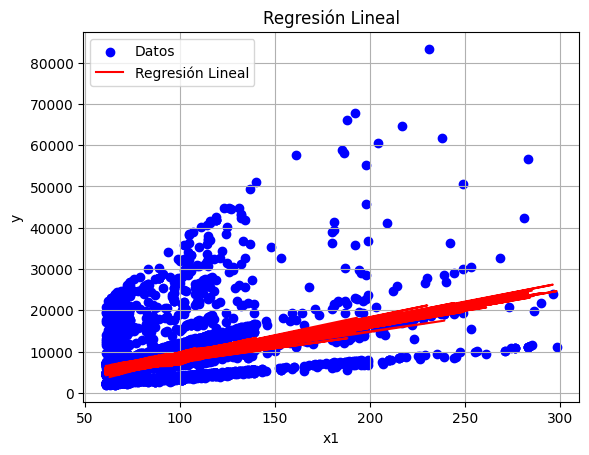

In [28]:
import matplotlib.pyplot as plt
# Scatter plot de los datos
plt.scatter(x1["Monthly Premium Auto"], y, color='blue', label='Datos')  

# Trazar la línea de regresión
plt.plot(x1["Monthly Premium Auto"], y_pred, color='red', label='Regresión Lineal')  

plt.xlabel('x1')  # Etiqueta del eje x
plt.ylabel('y')  # Etiqueta del eje y
plt.title('Regresión Lineal')  # Título del gráfico
plt.grid(True)  # Mostrar cuadrícula
plt.legend()  # Mostrar leyenda
plt.show()  # Mostrar gráfico

In [29]:
# 11. Model Validation. Description:
    # 11.1. R2:
from sklearn.metrics import r2_score

# Supongamos que tienes tus datos de predicción y de verdad
# y_pred = ...
# y_true = ...

# Calcular el R cuadrado
r_cuadrado = r2_score(y, y_pred)

print("R cuadrado del modelo:", r_cuadrado)
# El R cuadrado varía entre 0-1 (nula-total explicacion de la varibilidad). 
# R cuadrado no es una medida perfecta de la bondad del ajuste de un modelo. 
#Puede ser engañoso. Por lo tanto, es recomendable complementar el analisis con otras métricas de evaluación como:
#error cuadrático medio (MSE), error absoluto medio (MAE)para obtener una imagen más completa del rendimiento del modelo.

R cuadrado del modelo: 0.17583211353796635


In [30]:
# 11.2. MSE --> error cuadrático medio
from sklearn.metrics import mean_squared_error
# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y, y_pred)
print("Error cuadrático medio (MSE):", mse)

Error cuadrático medio (MSE): 39909826.011204064


In [31]:
import numpy as np
# 11.3. RMSE --> MRoot Mean Squared Error
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 6317.422418297202


In [32]:
from sklearn.metrics import mean_absolute_error
# 11.4. MAE --> Mean Absolut error
mae = mean_absolute_error(y, y_pred)
print("MAE:", mae)

MAE: 3893.685575257116
